<a href="https://colab.research.google.com/github/manasarthak/Emotion-classification-using-physiological-signal/blob/main/ModelTraining_Ml_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

import pandas as pd

In [2]:
dataset=np.load('/content/drive/MyDrive/DEAP/extracted_features/'+'features.npy',allow_pickle=True)

In [3]:
labels_val=np.load('/content/drive/MyDrive/DEAP/valence/' + 'all_valence_labels.npy',allow_pickle=True);
labels_ar=np.load('/content/drive/MyDrive/DEAP/arousal/'+'all_arousal_labels.npy',allow_pickle=True)

Exploratory Data Analysis

In [4]:
dataset.shape

(1280, 296065)

Normalising data

In [5]:
scaler = MinMaxScaler()
scaler.fit(dataset)
dataset_norm = scaler.transform(dataset)

In [6]:
dataset_norm

array([[0.        , 0.37832494, 0.39200665, ..., 0.70844209, 0.7363598 ,
        0.63749398],
       [0.        , 0.3493968 , 0.38279535, ..., 0.63317524, 0.6549347 ,
        0.56442378],
       [0.        , 0.43191976, 0.4576753 , ..., 0.81138901, 0.87829562,
        0.79154753],
       ...,
       [0.        , 0.39589771, 0.44309142, ..., 0.15014094, 0.02234762,
        0.00296573],
       [0.        , 0.40415303, 0.41135811, ..., 0.25040228, 0.03582643,
        0.0044488 ],
       [0.        , 0.39351987, 0.4089502 , ..., 0.1581727 , 0.01939812,
        0.0021336 ]])

Standardizing data

In [7]:
scaler=StandardScaler()
scaler.fit(dataset)
dataset_stan=scaler.transform(dataset)

In [8]:
dataset_stan

array([[ 0.        , -0.326437  , -0.1951826 , ...,  4.00749835,
         4.65525711,  3.4329132 ],
       [ 0.        , -0.84369393, -0.34593267, ...,  3.50393268,
         4.07582776,  2.96948166],
       [ 0.        ,  0.63187892,  0.87953558, ...,  4.69625492,
         5.66528693,  4.40996367],
       ...,
       [ 0.        , -0.01222249,  0.6408591 , ...,  0.27223762,
        -0.42572681, -0.59144151],
       [ 0.        ,  0.13538885,  0.12151895, ...,  0.94302659,
        -0.3298102 , -0.58203549],
       [ 0.        , -0.05474002,  0.08211159, ...,  0.32597333,
        -0.44671575, -0.59671912]])

In [9]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(dataset_stan,labels_ar,test_size=0.1,random_state=42,shuffle=True);
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape);

(1152, 296065) (1152,) (128, 296065) (128,)


As the number of features is too much for in built models to predict we want to reduce the number of dimensions by performing the Principal Component Analysis.

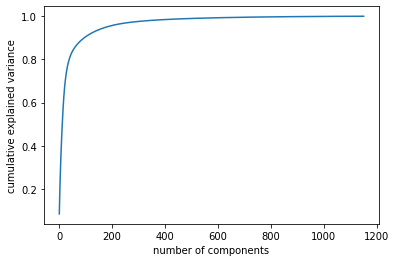

In [10]:
pca = PCA().fit(Xtrain)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

By convention lets use the number of components equal to the number of sample i.e. 1152. From the plot we can infer that more than 90% of variance can be accounted by 400 features.

In [11]:
pca= PCA(n_components=1152);
Xtrain=pca.fit_transform(Xtrain)
Xtest=pca.transform(Xtest)
explained_variance=pca.explained_variance_ratio_

In [12]:
svc=SVC()
svc.fit(Xtrain,Ytrain)
Ytpred=svc.predict(Xtrain)
Ypred=svc.predict(Xtest)
print('Model accuracy score with default hyperparameters i.e C=1,kernel=rbf,gamma=auto : ',accuracy_score(Ytrain,Ytpred),accuracy_score(Ytest,Ypred))

Model accuracy score with default hyperparameters i.e C=1,kernel=rbf,gamma=auto :  0.734375 0.609375


In [13]:
svc=SVC(kernel='linear')
svc.fit(Xtrain,Ytrain)
Ytpred=svc.predict(Xtrain)
Ypred=svc.predict(Xtest)
print('Model accuracy score after increasing the value of C i.e C=1.0,kernel=linear,gamma=auto : ',accuracy_score(Ytrain,Ytpred),accuracy_score(Ytest,Ypred))

Model accuracy score after increasing the value of C i.e C=1.0,kernel=linear,gamma=auto :  1.0 0.5625


In [14]:
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model to the training set
    knn.fit(Xtrain,Ytrain)
    Ytpred=knn.predict(Xtrain)
    Ypred=knn.predict(Xtest)
    print('Model accuracy score with k=',i,' : ',accuracy_score(Ytrain,Ytpred),accuracy_score(Ytest,Ypred))

Model accuracy score with k= 1  :  1.0 0.6328125
Model accuracy score with k= 2  :  0.7829861111111112 0.6171875
Model accuracy score with k= 3  :  0.7743055555555556 0.6015625
Model accuracy score with k= 4  :  0.7265625 0.6015625
Model accuracy score with k= 5  :  0.7404513888888888 0.546875
Model accuracy score with k= 6  :  0.7161458333333334 0.546875
Model accuracy score with k= 7  :  0.7065972222222222 0.5703125
Model accuracy score with k= 8  :  0.6979166666666666 0.578125
Model accuracy score with k= 9  :  0.7005208333333334 0.578125
Model accuracy score with k= 10  :  0.7005208333333334 0.6015625
Model accuracy score with k= 11  :  0.6996527777777778 0.5859375
Model accuracy score with k= 12  :  0.6866319444444444 0.5859375
Model accuracy score with k= 13  :  0.6831597222222222 0.6171875
Model accuracy score with k= 14  :  0.6762152777777778 0.609375
Model accuracy score with k= 15  :  0.6657986111111112 0.6015625
Model accuracy score with k= 16  :  0.6736111111111112 0.59375


In [ ]:
np.save('/content/drive/MyDrive/DEAP/total_extracted_features/' + 'ar_total_train.npy', Xtrain)
np.save('/content/drive/MyDrive/DEAP/total_extracted_features/' + 'ar_total_test.npy', Xtest)
np.save('/content/drive/MyDrive/DEAP/total_extracted_features/' + 'ar_total_train_lab.npy', Ytrain)
np.save('/content/drive/MyDrive/DEAP/total_extracted_features/' + 'ar_total_test_lab.npy', Ytest)